# Customer Segmentation Through RFM Analysis

### Dataset ###
The dataset that is used in this project is publicly available on UCI repository. This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. Link for dataset is https://archive.ics.uci.edu/ml/datasets/online+retail.

### Import Libraries and Load Dataset

In [125]:
# importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import datetime as dt
from itertools import cycle, islice

In [88]:
# load the excel file into a dataframe
data = pd.read_excel("Online Retail.xlsx")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [89]:
# check the summary of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


***
### Check for Missing Values

The columns that are required for RFM analysis are `InvoiceNo`, `Quantity`, `InvoiceDate`, `UnitPrice` and `CustomerID`. 
Before proceeding further, we need to make sure that missing values are handled.

In [90]:
# check for missing values
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**Note**: We can see from above that there are 135080 missing values in Customer ID. As they are unique values and generaetd randomly, We can't impute them or fill them with mean values. So, we will remove them as those records are not much valuable.

In [91]:
# Filetring dataframe for which there are no missing values of Customer ID.
data_notnull = data[pd.notnull(data["CustomerID"])]
data_notnull.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [92]:
data_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null datetime64[ns]
UnitPrice      406829 non-null float64
CustomerID     406829 non-null float64
Country        406829 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


**Note**: The are 406,829 rows with no missing values


### Remove Duplicates
We can check for any duplicate values in the dataframe using function `.duplicated()` and remove them accordingly using function `drop_duplicates()`. 

In [93]:
print("There are {} duplicated values.".format(data_notnull.duplicated().sum()))
data_notnull[data_notnull.duplicated(keep=False)].head(10)

There are 5225 duplicated values.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
548,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom


**Note**: From the table above, we can see that item 485 and 539 are duplicates, item 548 and 555 are duplicates etc. The duplicate values need to be removed. We will use `.drop_duplicates()` function to drop duplicates.

In [94]:
data_no_duplicates = data_notnull.drop_duplicates()

In [95]:
data_no_duplicates.duplicated().sum()

0

**Note**: We can see that there are no more duplicate values

In [96]:
data_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      401604 non-null object
StockCode      401604 non-null object
Description    401604 non-null object
Quantity       401604 non-null int64
InvoiceDate    401604 non-null datetime64[ns]
UnitPrice      401604 non-null float64
CustomerID     401604 non-null float64
Country        401604 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


**Note**: After removal of duplicate values, data is left with 401,604 rows.

#### Useful insights and Information from Data
Lets look in which countries are the customers based.

In [97]:
data_no_duplicates.Country.value_counts(normalize=True)[:10]

United Kingdom    0.888258
Germany           0.023605
France            0.021103
EIRE              0.018613
Spain             0.006295
Netherlands       0.005904
Belgium           0.005152
Switzerland       0.004674
Portugal          0.003663
Australia         0.003132
Name: Country, dtype: float64

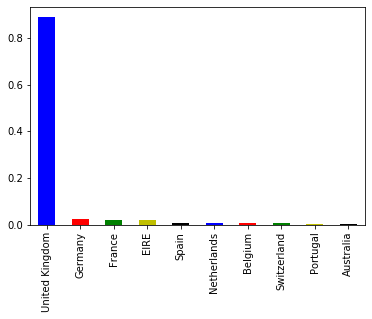

In [126]:
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data_no_duplicates)))
data_no_duplicates.Country.value_counts(normalize=True)[:10].plot(kind="bar", color=my_colors)

**Note**: We can see from the plot above that approx 85% of the customers are from UK. So, We can select only those customers and it will help marketing team to fcous their attention on a particular segment.

In [99]:
# filter customers from UK
Data_UK = data_no_duplicates[data_no_duplicates["Country"] == "United Kingdom"]

In [100]:
Data_UK.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356728 entries, 0 to 541893
Data columns (total 8 columns):
InvoiceNo      356728 non-null object
StockCode      356728 non-null object
Description    356728 non-null object
Quantity       356728 non-null int64
InvoiceDate    356728 non-null datetime64[ns]
UnitPrice      356728 non-null float64
CustomerID     356728 non-null float64
Country        356728 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.5+ MB


In [101]:
# lets look at statistics for the numeric columns of the dataframe
Data_UK.describe()

,Quantity,UnitPrice,CustomerID
count,356728.000000,356728.000000,356728.000000
mean,11.198644,3.268255,15543.795284
std,264.998044,71.162330,1594.286219
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,14191.000000
50%,4.000000,1.950000,15513.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,38970.000000,18287.000000


**Note**: From the above table, we see something strange i.e minimum quantity is negative. After studying the UCI website from which Data was obtained, I noticed that there are some transactions which are cancelled and they are represented with 'C' at the beginning of invoice ID.

In [102]:
# Lets look at cancelled transactions
Data_UK["InvoiceNo"].str.startswith("C", na=False).sum()

7501

**Note**: There are '7501' cancelled transactions in the Data. We need to remove these cancelled transactions from our Data.

In [103]:
# Removing cancelled transactions
New_Data= Data_UK[~Data_UK["InvoiceNo"].str.startswith("C", na=False)].copy()

In [104]:
New_Data.describe()

,Quantity,UnitPrice,CustomerID
count,349227.000000,349227.000000,349227.000000
mean,12.181295,2.972124,15548.333625
std,191.797470,17.990307,1594.403077
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,14191.000000
50%,4.000000,1.950000,15518.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,8142.750000,18287.000000


**Note**: We can see now that only Quantity is positive and we are left with 349227 rows.

### Compute RFM Values


#### Recency
In order to calculate Recency, we will calculate the number of days between present date and date of last purchase of each customer. We first define today's date and then get the `.max()` function of `InvoiceDate` to calculate the number of days between today and date of last purchase. 

In [105]:
# converting the InvoiceDate column to datetime data type
New_Data['InvoiceDate'] = pd.to_datetime(New_Data['InvoiceDate'])

In [106]:
New_Data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [107]:
print('Maximum Date is {}'.format(New_Data['InvoiceDate'].max()))
print('Minimum Date is {}'.format(New_Data['InvoiceDate'].min()))

Maximum Date is 2011-12-09 12:49:00
Minimum Date is 2010-12-01 08:26:00


In [108]:
# As we have historic Data and not a recent one,so lets make an assumption that we are doing this analysis on very next date
Today_date = dt.datetime(2011,12,10)

In [109]:
# As an example, lets calculate Recency for Customer ID = 17920.
Recency_example = Today_date - New_Data[New_Data["CustomerID"] == 17920].InvoiceDate.max()
Recency_example.days

4

**Note**: We can see that Customer with ID = 17290 has made transactions 4 days ago.

#### Frequency
In order to calculate Frequency, we will calculate unique number of transactions made by a customer. As an example, lets calculate Frequecy for Customer ID = 17920

In [110]:
print("Number of unique Invoices: ", uk_data_valid[uk_data_valid["CustomerID"] == 17920].InvoiceNo.unique().size)

Number of unique Invoices:  17


#### Monetory

In order to calculate Monetory, it will be sum of transactions i.e Quantity * Unit Price. For that, we will create a new column.


In [111]:
New_Data['Total_Price'] = New_Data['Quantity'] * New_Data['UnitPrice']

In [112]:
New_Data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [113]:
# As an example, lets calculate monetary for Customer ID == 17920
New_Data[New_Data["CustomerID"] == 17920].Total_Price.sum()

4119.5

### Group by RFM Values

In [114]:
rfm = New_Data.groupby("CustomerID").agg({"InvoiceDate": lambda date: (Today_date - date.max()).days,
                                        "InvoiceNo": lambda num: num.nunique(),
                                        "Total_Price": lambda price: price.sum()})

In [115]:
# Labelling the columns
rfm.columns=["recency", "frequency", "monetary"]

In [116]:
rfm.head(10)

,recency,frequency,monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,11,4196.01
12748.0,0,210,33053.19
12749.0,3,5,4090.88
12820.0,3,4,942.34
12821.0,214,1,92.72
12822.0,70,2,948.88
12823.0,74,5,1759.50
12824.0,59,1,397.12


##### lets verify our calculations by filtering the same Customer ID = 17920

In [117]:
rfm.loc[17920]

recency         4.0
frequency      17.0
monetary     4119.5
Name: 17920.0, dtype: float64

**Note**: We can see that we are getting the same values. Hence, our calculations are correct in the table.

### Compute Quantile of RFM Values

In RFM Analysis, Customers with lowest recency, highest frequency and highest monetary amounts are considered as top customers.
But, the RFM values we have calculated are not appropriate to segment the customers. So, we will divide the customers into different segments by making use of qcut function. This function will calculate quartiles between 1,2,3,4 and assign each customer among those values for Recency, Frequency and Monetory.

In [118]:
rfm["r_quartile"] = pd.qcut(rfm["recency"], 4, ["1","2","3","4"])
rfm["f_quartile"] = pd.qcut(rfm["frequency"], 4, ["3","2","1"], duplicates="drop")
rfm["m_quartile"] = pd.qcut(rfm["monetary"], 4, ["4","3","2","1"])

In [119]:
rfm.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346.0,325,1,77183.60,4,3,1
12747.0,2,11,4196.01,1,1,1
12748.0,0,210,33053.19,1,1,1
12749.0,3,5,4090.88,1,2,1
12820.0,3,4,942.34,1,2,2


In [120]:
# Lets rank the customers by combining all the quartile values into a single column
rfm["RFM_Score"] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
12346.0,325,1,77183.60,4,3,1,431
12747.0,2,11,4196.01,1,1,1,111
12748.0,0,210,33053.19,1,1,1,111
12749.0,3,5,4090.88,1,2,1,121
12820.0,3,4,942.34,1,2,2,122


In [121]:
# Now, lets sort the customers whose values are 111 and also by frequency and Monetory.
rfm[rfm["RFM_Score"]=="111"].sort_values(by=["monetary", "frequency"], ascending=False).head(10)

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
18102.0,0,60,259657.30,1,1,1,111
17450.0,8,46,194390.79,1,1,1,111
17511.0,2,31,91062.38,1,1,1,111
16684.0,4,28,66653.56,1,1,1,111
14096.0,4,17,65164.79,1,1,1,111
13694.0,3,50,65039.62,1,1,1,111
15311.0,0,91,60632.75,1,1,1,111
13089.0,2,97,58762.08,1,1,1,111
17949.0,1,45,58510.48,1,1,1,111


### Conclusion

We have segmented the customers by lowest recency, highest frequency and highest Monetory. These are the top customers which contribute most to the revenue. This analysis will benefit marketing team to target these customers for promotions and personlized services.